Import Necessary Libraries and Load the Dataset

In [1]:
%pip install matplotlib
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install scikit-learn
%pip install xgboost

# Import Necessary Libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('epl_player_stats_24_25.csv')

#Remove players with less than 15 appearances
data = data[data['Appearances'] >= 15]

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Split and Train Data to Predict Position

Accuracy of Random Forest Classifier: 0.85


C:\Users\sidhu\AppData\Local\Temp\ipykernel_28440\1518527673.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


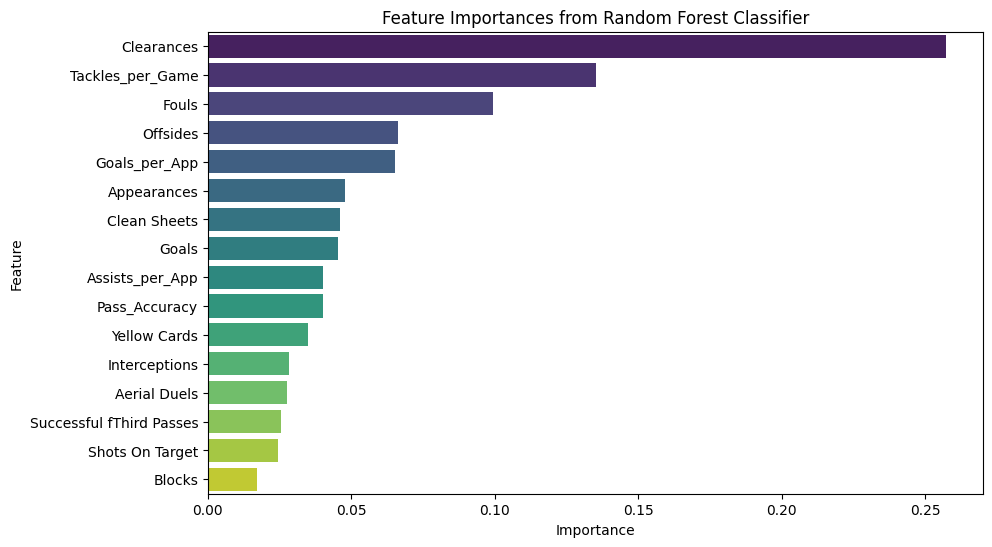

Accuracy from Confusion Matrix: 0.85


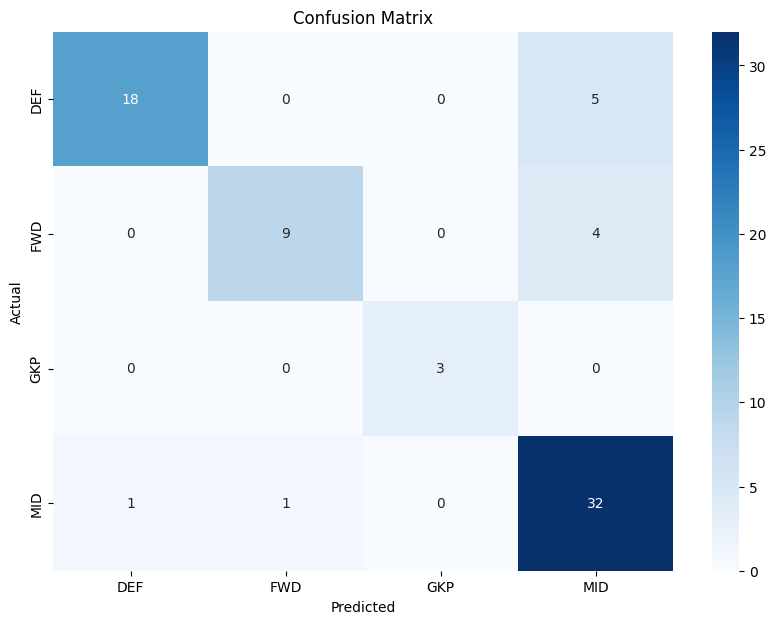

C:\Users\sidhu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xgboost\training.py:183: UserWarning: [20:21:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\sidhu\AppData\Local\Temp\ipykernel_28440\1518527673.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=xgb_importance_df, palette='magma')


Accuracy of XGBoost Classifier: 0.86


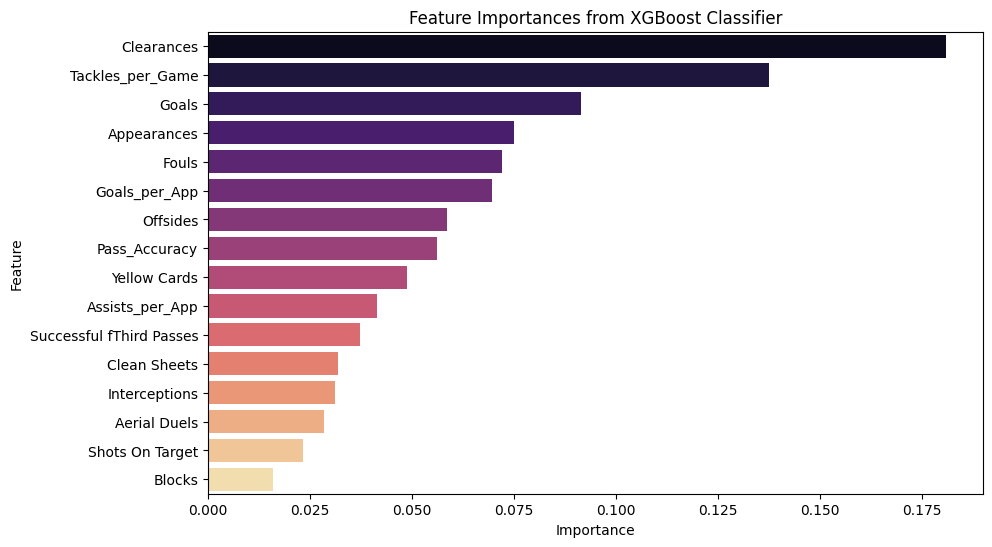

In [6]:
# Add new features based on existing statistics
data['Goals_per_App'] = data['Goals'] / data['Appearances']
data['Assists_per_App'] = data['Assists'] / data['Appearances']
data['Pass_Accuracy'] = data['Successful Passes'] / data['Passes']
data['Tackles_per_Game'] = data['Tackles'] / data['Appearances']

#Feature and Target Variables
#features = ['Goals_per_App', 'Assists_per_App', 'Big Chances Missed', 'Pass_Accuracy', 'Crosses', 'Clean Sheets', 'Tackles_per_Game', 'Clearances']
features = ['Goals_per_App', 'Assists_per_App', 'Pass_Accuracy', 'Tackles_per_Game', 'Clean Sheets', 'Clearances', 'Fouls', 'Offsides', 'Successful fThird Passes', 
            'Interceptions', 'Aerial Duels', 'Shots On Target', 'Goals', 'Appearances', 'Yellow Cards', 'Blocks']
target = 'Position'
#Split the data into training and testing sets
x = data[features]
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
#Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
#Make predictions
y_pred = rf_model.predict(x_test)
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Random Forest Classifier: {accuracy:.2f}')
#Visualize Random Forest Feature Importances
feature_importances = rf_model.feature_importances_
# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
#Check Accuracy of Confusion Matrix
accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
print(f'Accuracy from Confusion Matrix: {accuracy:.2f}')
# Visualize the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Encode target labels for XGBoost
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# Train an XGBoost Classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(x_train, y_train_enc)
# Make predictions
y_pred_xgb = xgb_model.predict(x_test)
# Evaluate the model
accuracy_xgb = accuracy_score(y_test_enc, y_pred_xgb)
print(f'Accuracy of XGBoost Classifier: {accuracy_xgb:.2f}')

#Display XGBoost Feature Importances
xgb_feature_importances = xgb_model.feature_importances_
# Create a DataFrame for XGBoost feature importances
xgb_importance_df = pd.DataFrame({'Feature': features, 'Importance': xgb_feature_importances})
xgb_importance_df = xgb_importance_df.sort_values(by='Importance', ascending=False)
# Plot the XGBoost feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df, palette='magma')
plt.title('Feature Importances from XGBoost Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()